Black scholes model

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

def black_schole_call_price(S,k,T,r,sigma):
    """Calculate the Black-Scholes call option price."""
    d1 = (np.log(S / k) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - k * np.exp(-r * T) * norm.cdf(d2)
    return call_price

print(black_schole_call_price(100, 100, 1, 0.05, 0.2))  # Example usage

10.450583572185565


Simulate Geometric Brownian Motion price path

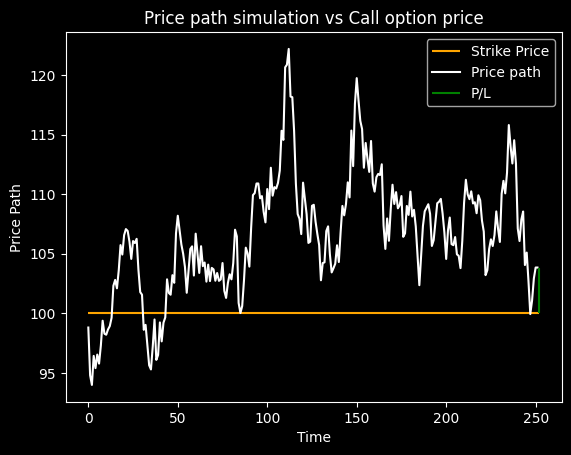

Option Premium at t0: 10.45
P/L: -6.61


In [9]:
import qfin as qf
import matplotlib.pyplot as plt

path = qf.simulations.GeometricBrownianMotion(100,0.05,.3,1/252,1)
plt.title("Price path simulation vs Call option price")
plt.hlines(100,0,252, label="Strike Price",color="orange")
plt.plot(path.simulated_path, label="Price path", color="white")

if max(path.simulated_path[-1]-100,0)==0:
    plt.vlines(252, path.simulated_path[-1],100, color="red", label="P/L")
else:
    plt.vlines(252,100, path.simulated_path[-1], color="green", label="P/L")
plt.style.use('dark_background')
plt.xlabel("Time")
plt.ylabel("Price Path")
plt.legend()
plt.show()

print("Option Premium at t0:", round(black_schole_call_price(100,100,1,0.05,0.2),2))
print("P/L:", round(max(path.simulated_path[-1]-100,0) - black_schole_call_price(100,100,1,0.05,0.2),2))

Understanding the profitability of the edge 

354.73


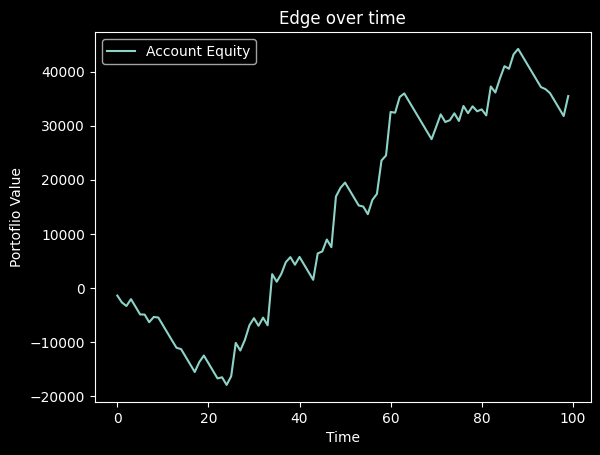

In [12]:
premium = 14.10 * 100
pl = []
for i in range (100):
    path = qf.simulations.GeometricBrownianMotion(100,.05,.3,1/252,1)
    pl.append(max(path.simulated_path[-1]-100,0)*100-premium)

mean_pl = np.mean(pl)
print(round(mean_pl,2))

plt.title("Edge over time")
plt.plot(np.cumsum(pl), label="Account Equity")
plt.style.use("dark_background")
plt.xlabel("Time")
plt.ylabel("Portoflio Value")
plt.legend()
plt.show()

The larger the number we put in the range loop the more we see the probability come in action and start bringing profitability through the "edge"